## PRÀCTICA XNDL - Abril Risso i Anna Casanovas

Importem les llibreries necessàries

In [101]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [102]:
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

In [151]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [153]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, fashion_mnist

from keras.optimizers.legacy import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_covtype, fetch_california_housing
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1_l2, l2

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.regularizers import l1_l2
from typing import List, Dict, Any

Carreguem el dataset

In [103]:
path_rain_data = "rain_data.csv"
rain_data = pd.read_csv(path_rain_data, header=0, delimiter=',')

In [104]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


## 1. ANÀLISI EXPLORATÒRIA DE DADES

In [105]:
data = rain_data

In [61]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [160]:
print(data.shape)
print(data.columns)

(67021, 23)
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


### ANÀLISI UNIVARIANT

#### Variables Numèriques

In [161]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000


In [162]:
var_num = [feature for feature in data.columns if data[feature].dtypes != 'object' and data[feature].dtypes != 'category' and data[feature].dtypes != 'bool']
print('Number of numerical variables: ', len(var_num))
print('*'*80)
print('Numerical Variables Column: ', var_num)

Number of numerical variables:  16
********************************************************************************
Numerical Variables Column:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


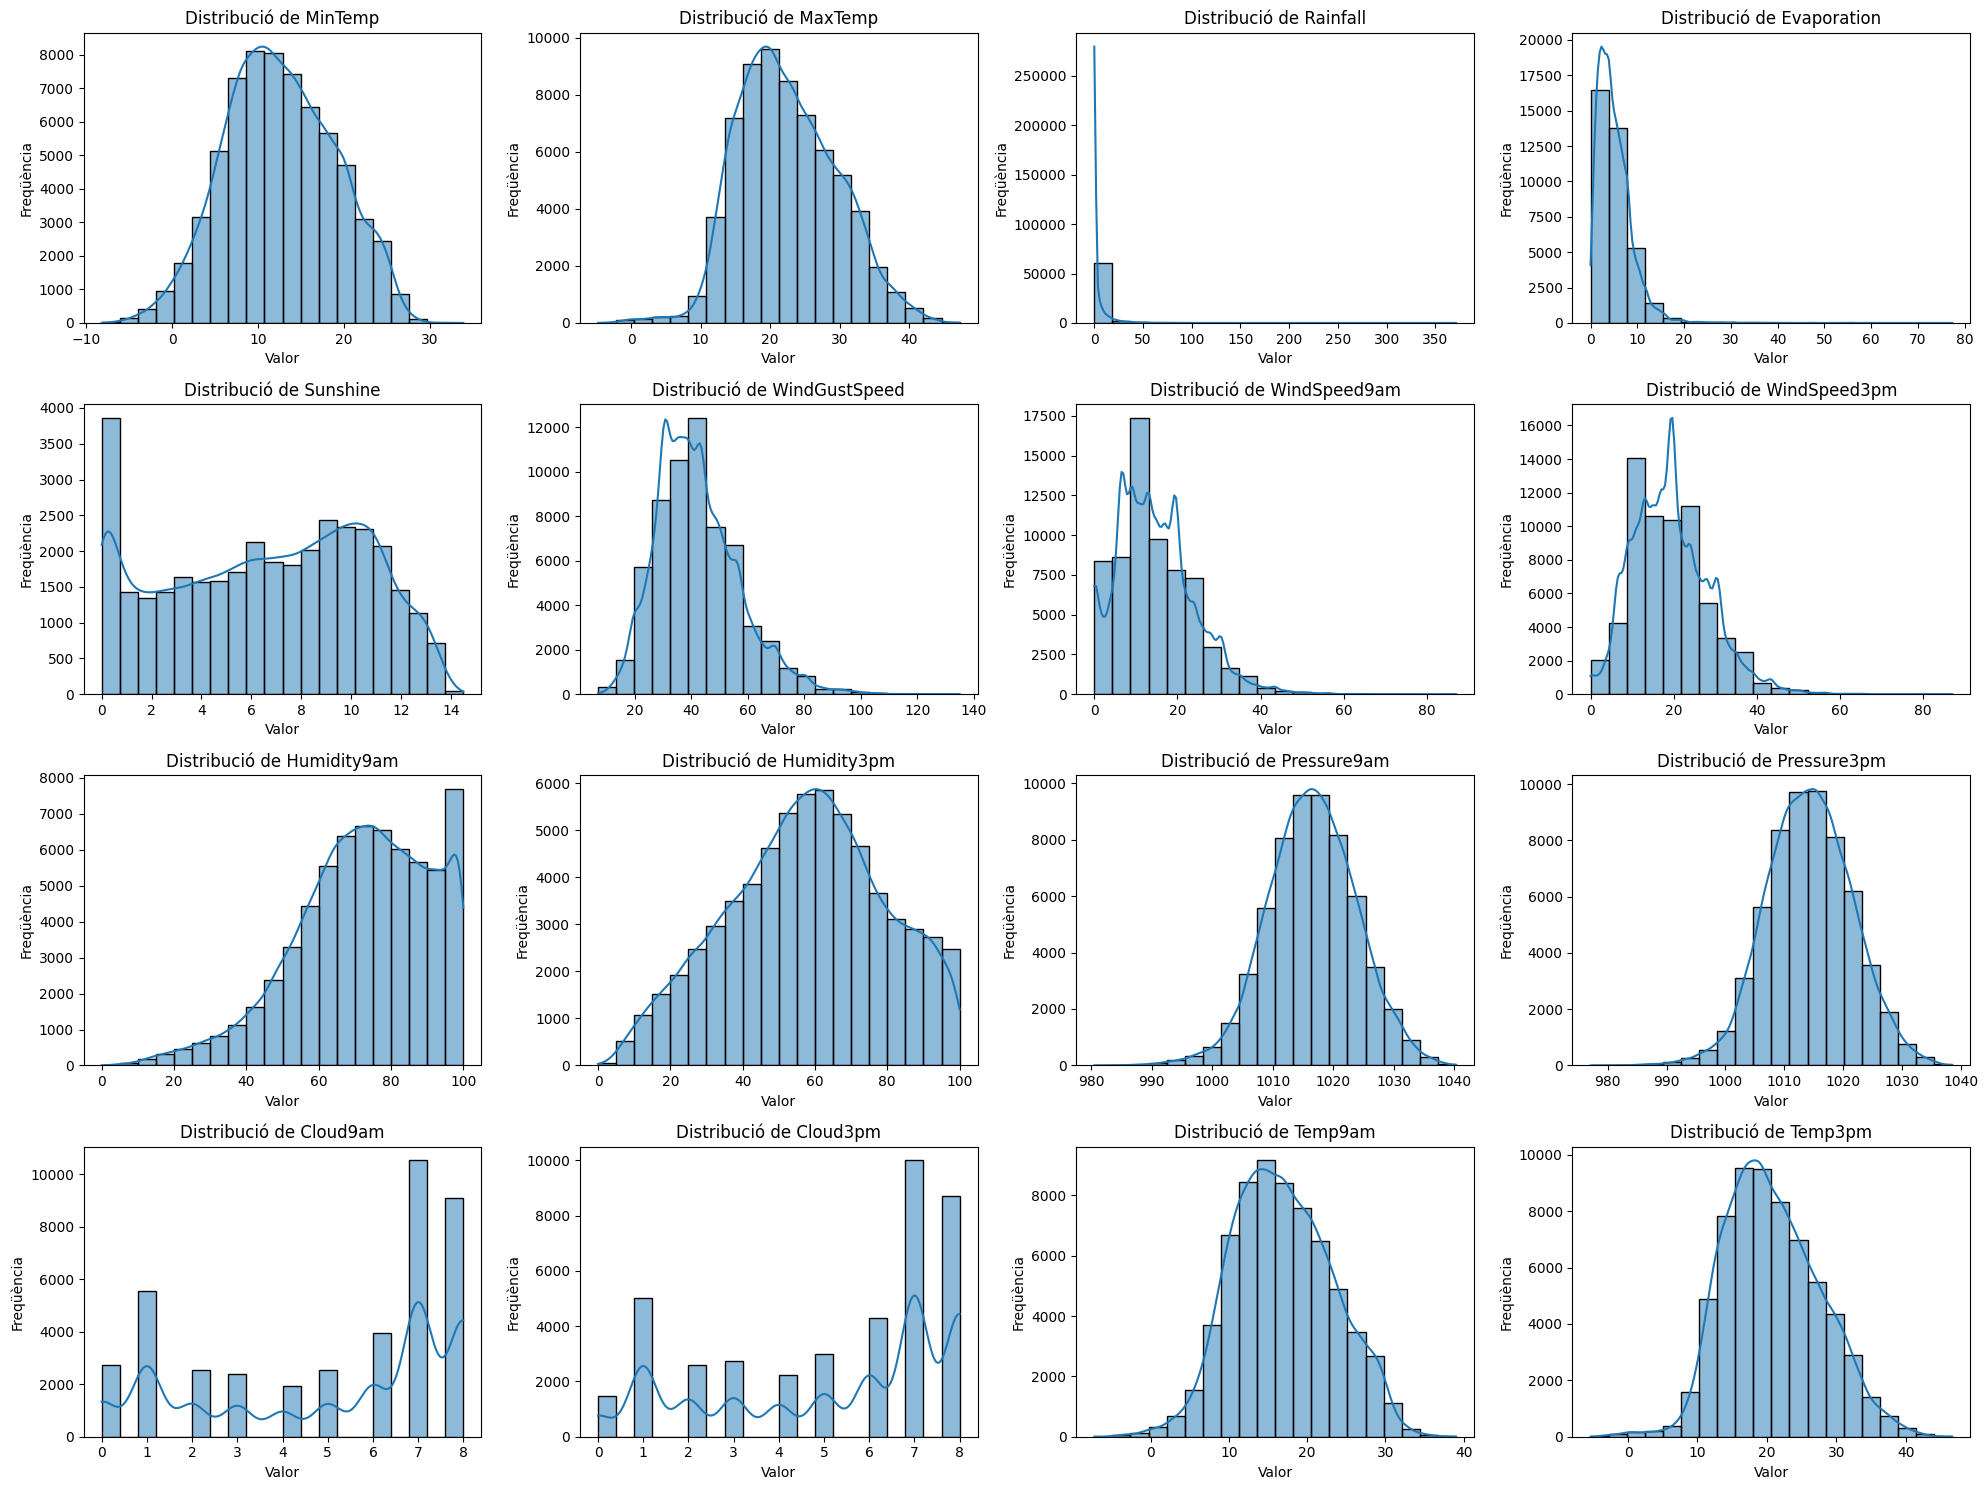

         Variable      Mitjana  Desviació Estàndard
0         MinTemp    12.552091             6.371143
1         MaxTemp    22.480866             7.108686
2        Rainfall     3.669512            10.981571
3     Evaporation     5.122383             3.950017
4        Sunshine     6.514499             3.932475
5   WindGustSpeed    42.142150            14.638665
6    WindSpeed9am    14.634764             9.227585
7    WindSpeed3pm    19.187194             9.171806
8     Humidity9am    72.074781            18.481003
9     Humidity3pm    57.521433            21.741282
10    Pressure9am  1016.524147             7.343975
11    Pressure3pm  1014.237604             7.283068
12       Cloud9am     5.053870             2.778949
13       Cloud3pm     5.184148             2.620094
14        Temp9am    16.888700             6.427827
15        Temp3pm    20.822340             6.931696


In [163]:
estadistiques = pd.DataFrame(columns=['Variable', 'Mitjana', 'Desviació Estàndard'])

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(var_num):
    mitjana = np.mean(data[column])
    desviacio_estandard = np.std(data[column], ddof=1)

    new_row = pd.DataFrame({
        'Variable': [column],
        'Mitjana': [mitjana],
        'Desviació Estàndard': [desviacio_estandard]
    })

    estadistiques = pd.concat([estadistiques, new_row], ignore_index=True)

    sns.histplot(data[column], bins=20, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribució de {column}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Freqüència')

plt.tight_layout()
plt.show()

print(estadistiques)

#### Variables Categòriques

In [164]:
var_cat = [feature for feature in data.columns if data[feature].dtypes == 'O' or data[feature].dtypes == 'category']
print('Number of categorical variables: ', len(var_cat))
print('*'*80)
print('Categorical variables column name:',var_cat)

Number of categorical variables:  7
********************************************************************************
Categorical variables column name: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


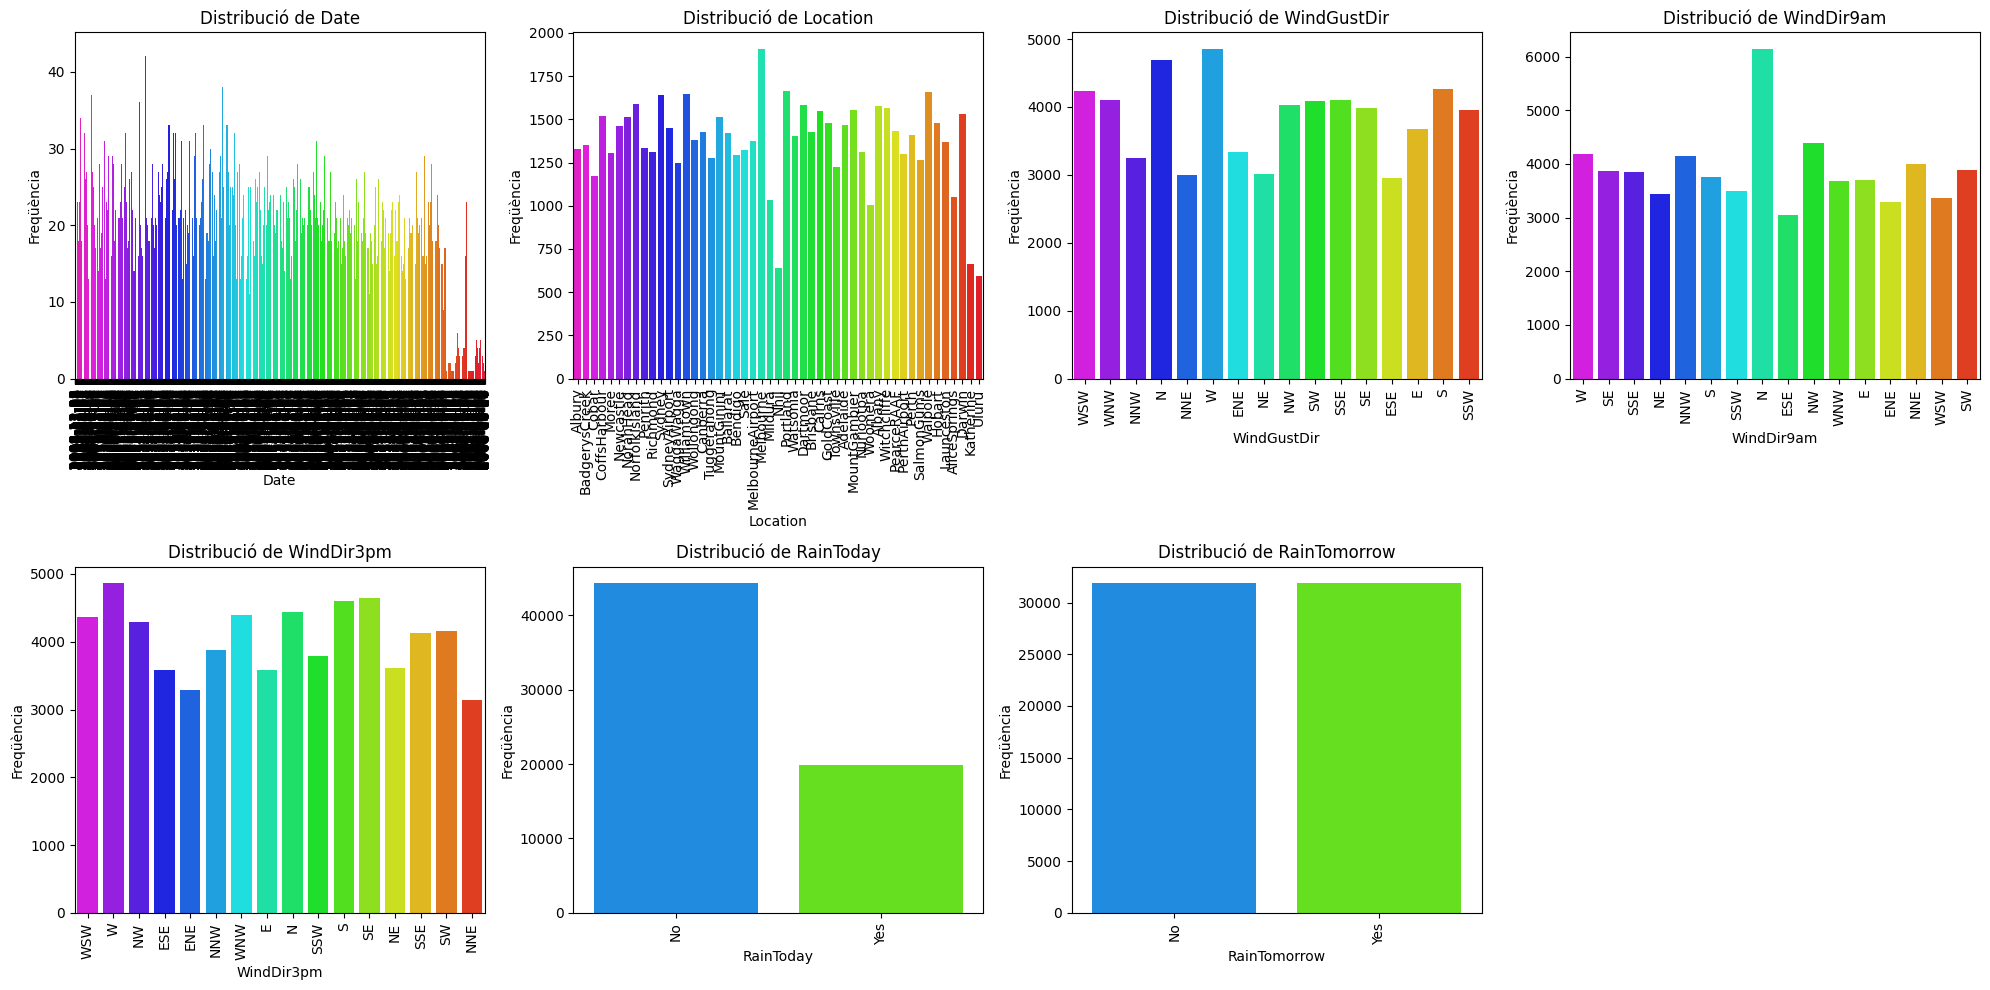

In [165]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  
axes = axes.flatten() 

for i, column in enumerate(var_cat):
    sns.countplot(x=column, hue=column, data=data, palette="gist_rainbow_r", ax=axes[i], legend=False)
    axes[i].set_title(f'Distribució de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Freqüència')

    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [166]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                         columns=['col_name', 'unique']).sort_values(by=['unique'])
unique_counts

,col_name,unique
22,RainTomorrow,2
21,RainToday,2
18,Cloud3pm,9
17,Cloud9am,9
10,WindDir3pm,16
9,WindDir9am,16
7,WindGustDir,16
12,WindSpeed3pm,42
11,WindSpeed9am,42
1,Location,49


### ANÀLISI BIVARIANT

#### Categòriques amb la variable objectiu

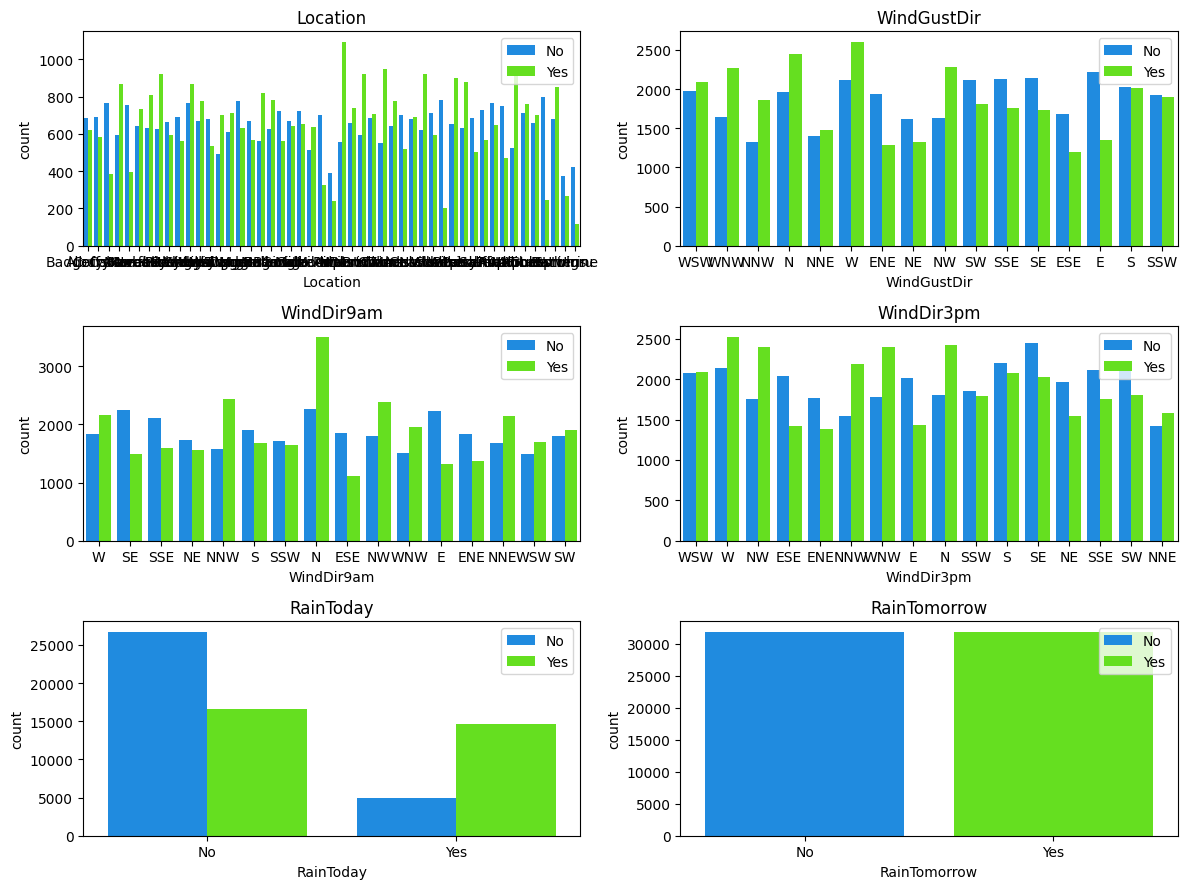

In [167]:
n_cols = 2 
n_rows = (len(var_cat[1:]) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), dpi=100)  
axes = axes.flatten()  

for idx, variable in enumerate(var_cat[1:]):
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r', ax=axes[idx])
    axes[idx].legend(loc='upper right')
    axes[idx].set_title(variable)

for ax in axes[len(var_cat[1:]):]:
    ax.set_visible(False) 

plt.tight_layout()
plt.show()

Aquí podem observar que hi ha algunes variables categòriques que tenen una gran quantitat de categories. Ens encarregarem d'això al preprocessament

#### Numèriques amb la variable objectiu

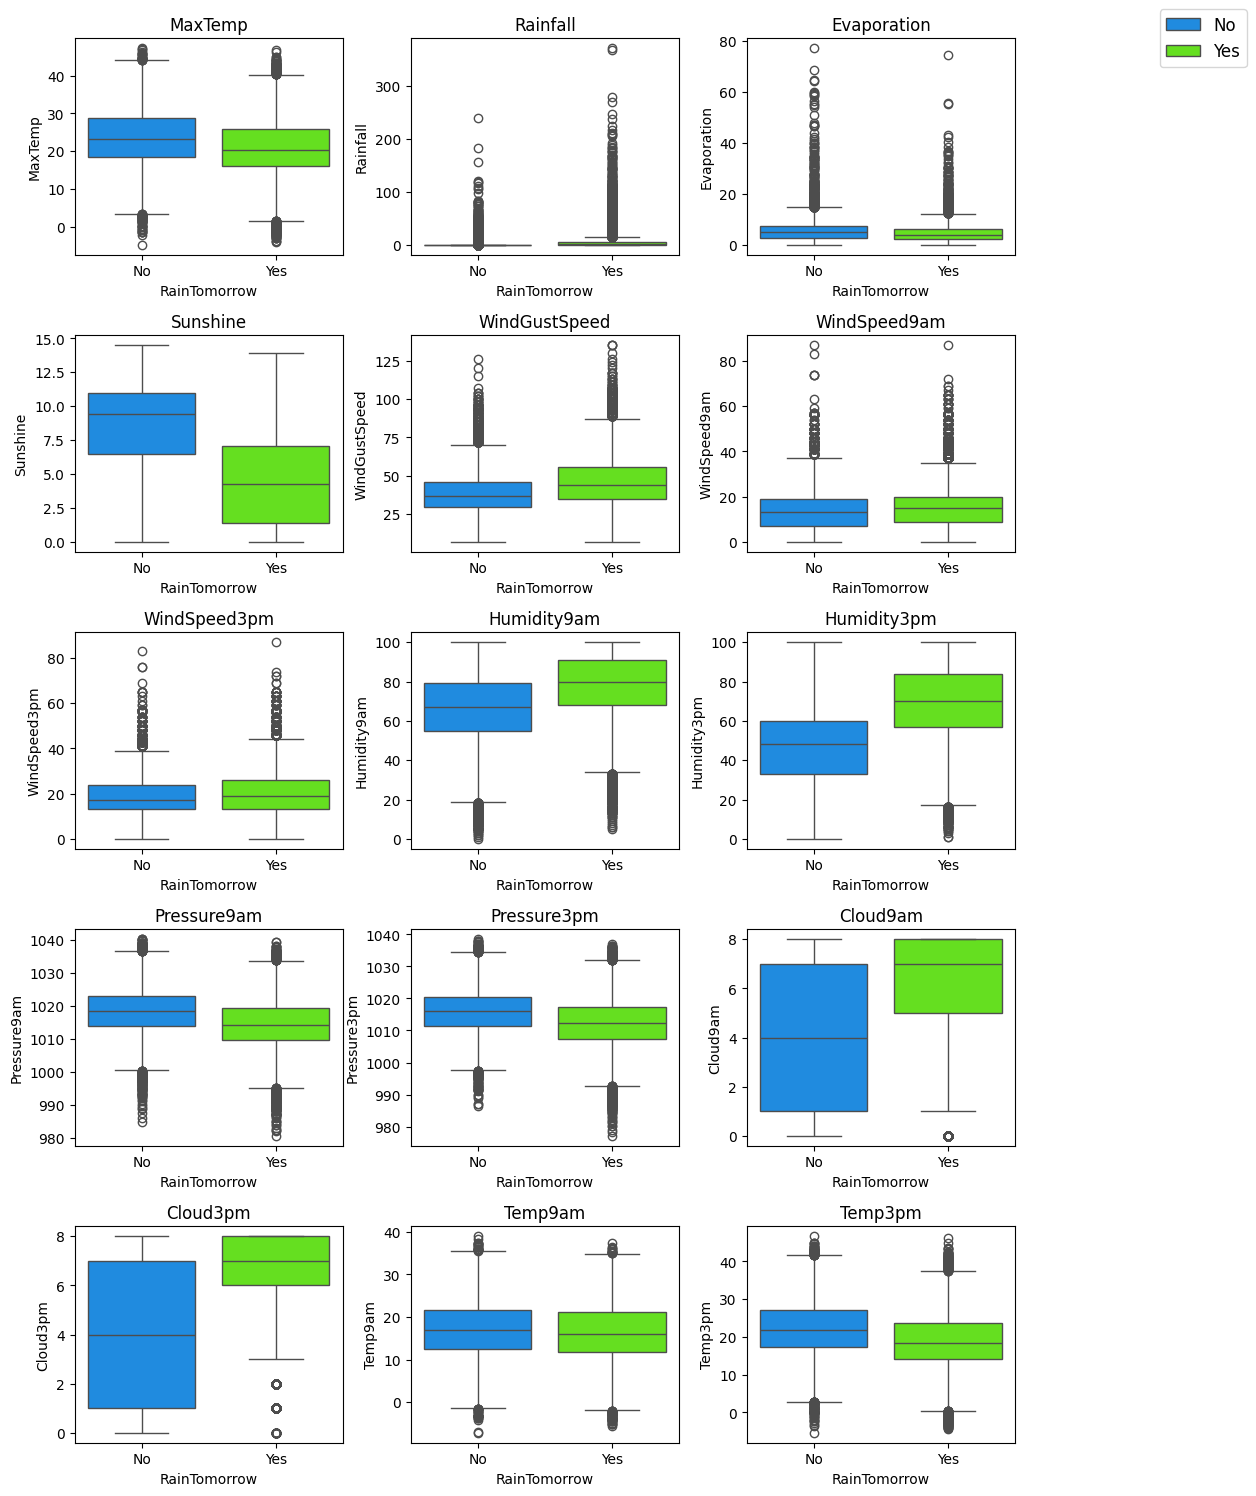

In [168]:
n_cols = 3
n_rows = (len(var_num[1:]) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3), dpi=100)
axes = axes.flatten() 

for idx, variable in enumerate(var_num[1:]):
    sns.boxplot(data=data, x='RainTomorrow', hue='RainTomorrow', y=variable, palette='gist_rainbow_r', ax=axes[idx])
    axes[idx].set_title(f'{variable}')
    axes[idx].set_xlabel('RainTomorrow')
    axes[idx].set_ylabel(variable)
    axes[idx].legend().remove()

for ax in axes[len(var_num[1:]):]:
    ax.set_visible(False)  

handles, labels = axes[0].get_legend_handles_labels()  
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='large')

plt.tight_layout()
plt.subplots_adjust(right=0.85) 
plt.show()

#### Dues variables numèriques

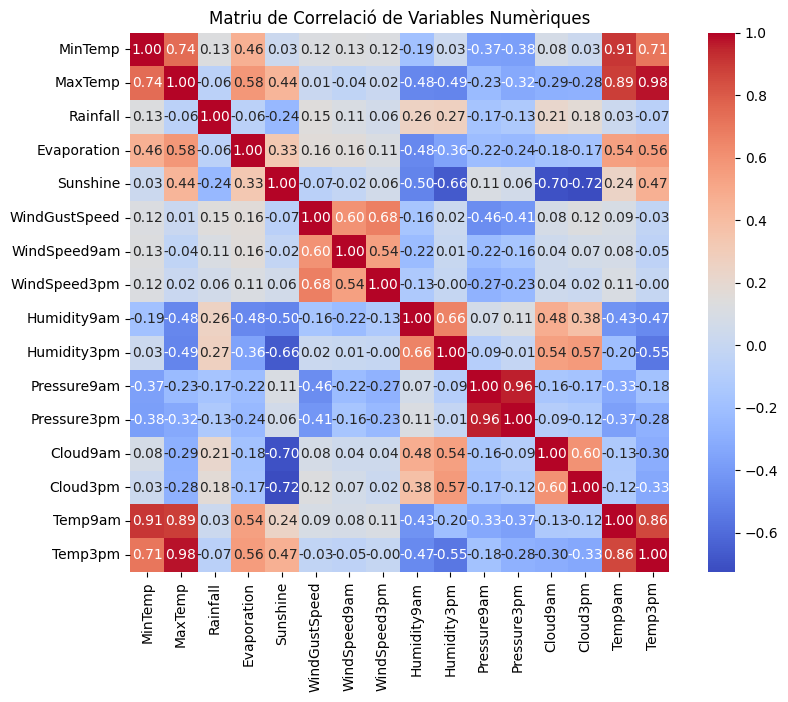

In [169]:
corr_matrix = data[var_num].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriu de Correlació de Variables Numèriques')
plt.show()

De les variables que veiem que tenen una alta correlació, fem un scatter plot. 

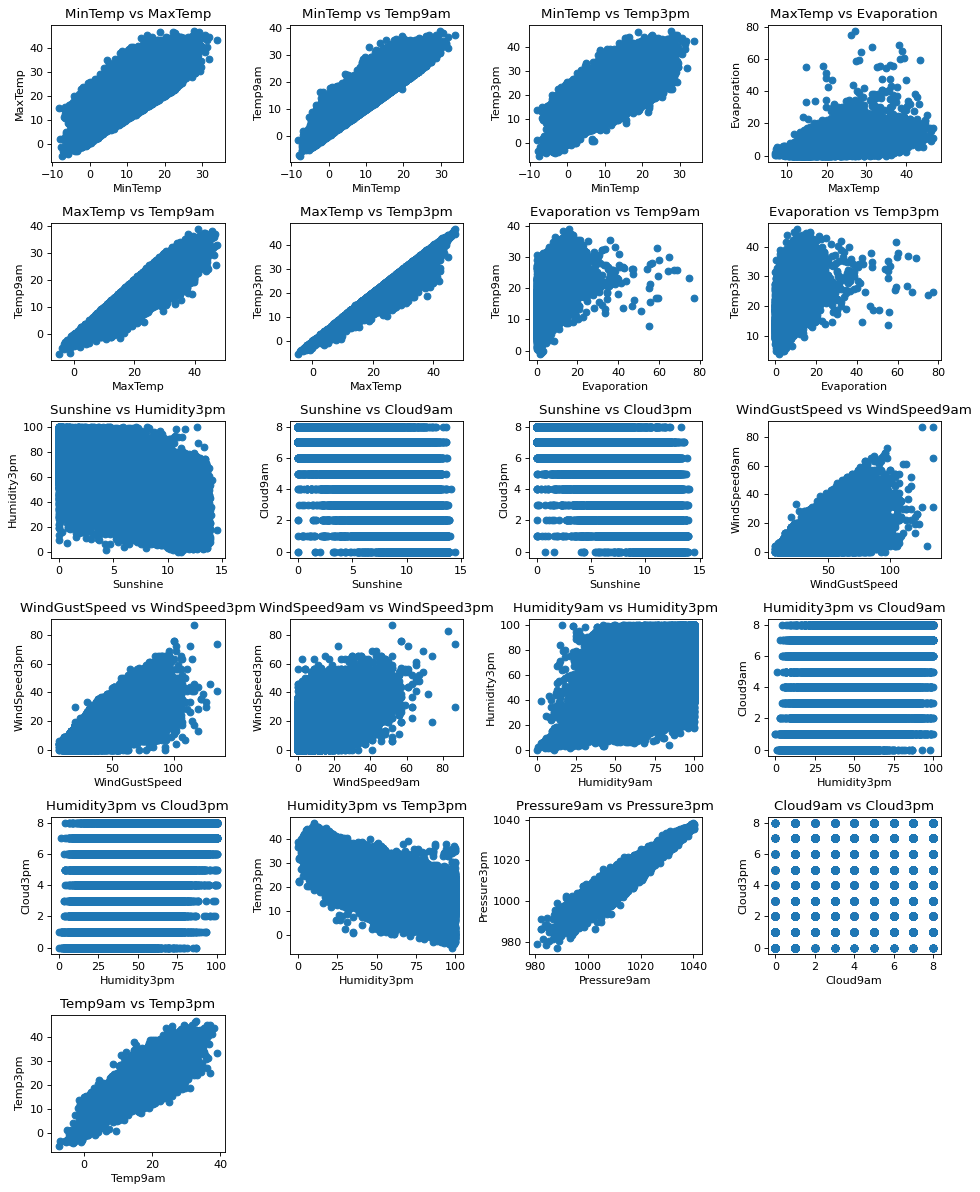

In [170]:
corr_matrix = data[var_num].corr().abs()

umbral_correlacion = 0.5
parejas_alta_corr = np.where((np.triu(corr_matrix.values, k=1) < -umbral_correlacion) | (np.triu(corr_matrix.values, k=1) > umbral_correlacion))

indices_fila = parejas_alta_corr[0]
indices_columna = parejas_alta_corr[1]

num_graficos = len(indices_fila)
n_cols = 4  
n_rows = (num_graficos + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 2.5 * n_rows), dpi=80) 
axes = axes.flatten() 

for idx, (fila, columna) in enumerate(zip(indices_fila, indices_columna)):
    variable_x = corr_matrix.columns[fila]
    variable_y = corr_matrix.index[columna]

    axes[idx].scatter(data[variable_x], data[variable_y])
    axes[idx].set_title(f'{variable_x} vs {variable_y}')
    axes[idx].set_xlabel(variable_x)
    axes[idx].set_ylabel(variable_y)

for ax in axes[num_graficos:]:
    ax.set_visible(False)  

plt.tight_layout()
plt.show()

### Anàlisi de redundància

In [171]:
import pandas as pd
from scipy.stats import chi2_contingency

categoriques = data.select_dtypes(include=['category', 'object']).columns.tolist()

for var in categoriques:
    contingency_table = pd.crosstab(data[var], data['RainTomorrow'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    if p < 0.05:
        relevance = "Rellevant"
    else:
        relevance = "No rellevant"

    print(f"Chi-square test for {var}: chi2 = {chi2}, p-value = {p}, Relevance: {relevance}")


Chi-square test for Date: chi2 = 11119.607714894802, p-value = 0.0, Relevance: Rellevant
Chi-square test for Location: chi2 = 2415.678336293762, p-value = 0.0, Relevance: Rellevant
Chi-square test for WindGustDir: chi2 = 971.9961979403071, p-value = 1.3506248993834652e-197, Relevance: Rellevant
Chi-square test for WindDir9am: chi2 = 1413.5083205121614, p-value = 2.0544079644459983e-292, Relevance: Rellevant
Chi-square test for WindDir3pm: chi2 = 851.6414955468024, p-value = 7.814567692064555e-172, Relevance: Rellevant
Chi-square test for RainToday: chi2 = 7169.769628578961, p-value = 0.0, Relevance: Rellevant
Chi-square test for RainTomorrow: chi2 = 63750.000062741165, p-value = 0.0, Relevance: Rellevant


Veiem que totes les variables categòriques són rellevants per a la predicció de la nostra variable objectiu

## 2. ESTRATÈGIA DE PREPROCESSAMENT

### Recodificació de variables categòriques

Ens encarreguem primer de les variables que tenen una gran quantitat de categories

Date: 

In [106]:
# Partirem les dates en tres variables diferents (day, month, year)

data['Date']= pd.to_datetime(data["Date"])

data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['day'] = data.Date.dt.day

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,1005.4,NaN,NaN,20.6,28.9,No,No,2008,12,6
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,1003.6,NaN,NaN,18.3,30.2,No,Yes,2008,12,9
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,1008.7,NaN,NaN,20.4,28.8,No,Yes,2008,12,11
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

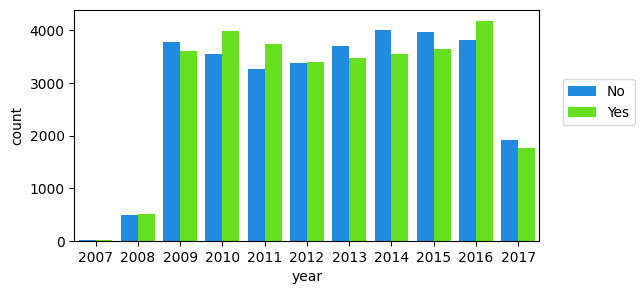

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

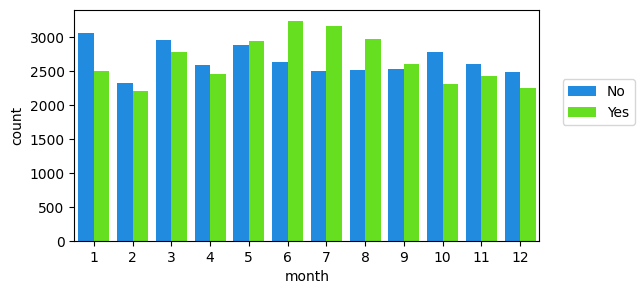

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

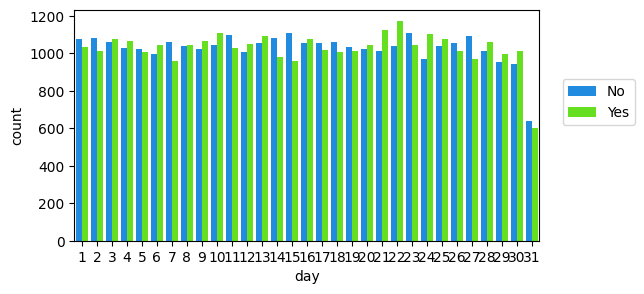

In [107]:
variables_temporals = ['year', 'month', 'day']
for variable in variables_temporals:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r')
    plt.legend(loc=(1.05, 0.5))
    plt.show()

In [108]:
data = data.drop(columns=['Date'])

Location

In [109]:
# Para reducir el numero de categorias dividiremos las ciudades por estados en Australia

ciudades_por_estado = {
    'New South Wales': ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle',
                        'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport',
                        'WaggaWagga', 'Williamtown', 'Wollongong'],
    'Australian Capital Territory': ['Canberra', 'Tuggeranong', 'MountGinini'],
    'Victoria': ['Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne',
                 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor'],
    'Queensland': ['Brisbane', 'Cairns', 'GoldCoast', 'Townsville'],
    'South Australia': ['Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera'],
    'Western Australia': ['Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole'],
    'Tasmania': ['Hobart', 'Launceston'],
    'Northern Territory': ['AliceSprings', 'Darwin', 'Katherine', 'Uluru']
}


In [110]:
ciudad_a_estado = {}
for estado, ciudades in ciudades_por_estado.items():
    for ciudad in ciudades:
        ciudad_a_estado[ciudad] = estado


In [111]:
data['State'] = data['Location'].map(ciudad_a_estado)
print(data[['Location', 'State']])
print(data['State'].value_counts())


      Location               State
0       Albury     New South Wales
1       Albury     New South Wales
2       Albury     New South Wales
3       Albury     New South Wales
4       Albury     New South Wales
...        ...                 ...
67016    Uluru  Northern Territory
67017    Uluru  Northern Territory
67018    Uluru  Northern Territory
67019    Uluru  Northern Territory
67020    Uluru  Northern Territory

[67021 rows x 2 columns]
State
New South Wales                 21248
Victoria                        13643
Western Australia               10213
Queensland                       5684
South Australia                  5335
Australian Capital Territory     4218
Northern Territory               3833
Tasmania                         2847
Name: count, dtype: int64


In [112]:
data.drop('Location', axis=1, inplace=True)
print(data.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     12.9     25.7       0.0          NaN       NaN         WSW   
1     14.6     29.7       0.2          NaN       NaN         WNW   
2      9.7     31.9       0.0          NaN       NaN         NNW   
3     13.4     30.4       0.0          NaN       NaN           N   
4     15.9     21.7       2.2          NaN       NaN         NNE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Cloud9am  Cloud3pm  \
0           46.0          W        WSW          19.0  ...       NaN       2.0   
1           56.0          W          W          19.0  ...       NaN       NaN   
2           80.0         SE         NW           7.0  ...       NaN       NaN   
3           30.0        SSE        ESE          17.0  ...       NaN       NaN   
4           31.0         NE        ENE          15.0  ...       8.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  \
0     21.0     23.2         No        

Wind direction: 'WindGustDir', 'WindDir9am', 'WindDir3pm'

In [113]:
def simplificar_direccio(dir: str):

    """
    Simplifica la direcció del vent donada per una cardinal bàsica (Nord, Sud, Est, Oest)
    """

    if dir in ['N', 'NNE', 'NE', 'ENE']:
        return 'N'
    elif dir in ['S', 'SSW', 'SW', 'WSW']:
        return 'S'
    elif dir in ['E', 'ESE', 'SE', 'SSE']:
        return 'E'
    elif dir in ['W', 'WNW', 'NW', 'NNW']:
        return 'O'
    else:
        return np.nan  


In [114]:
data['WindGustDir'] = data['WindGustDir'].apply(simplificar_direccio)
data['WindDir9am'] = data['WindDir9am'].apply(simplificar_direccio)
data['WindDir3pm'] = data['WindDir3pm'].apply(simplificar_direccio)


In [115]:
print(data['WindGustDir'].unique())
print(data['WindDir9am'].unique())
print(data['WindDir3pm'].unique())


['S' 'O' 'N' nan 'E']
['O' 'E' 'N' 'S' nan]
['S' 'O' 'E' 'N' nan]


Un cop fets tots els canvis, les nostres variables categòriques les recodificarem utilitzant el one-hot encoding per poder-les utilitzar als models

In [117]:
from typing import Tuple, List

def recodificacio_one_hot(X_train: np.ndarray, X_test: np.ndarray, categoriques: List[str], numeriques: List[str]) -> Tuple[np.ndarray, np.ndarray]:
    
    """
    Aplica One-hot encoding a les columnes categòriques del conjunt de dades
    de train i test. 

    Retorna els dos arrays amb les columnes categòriques recodificades. 
    """
    
    encoder = OneHotEncoder(sparse_output=False)
    train_encoded = encoder.fit_transform(X_train[categoriques])
    test_encoded = encoder.transform(X_test[categoriques])
    X_train_combined = np.concatenate((X_train[numeriques], train_encoded), axis=1)
    X_test_combined = np.concatenate((X_test[numeriques], test_encoded), axis=1)
    return X_train_combined, X_test_combined

### Identificació i tractament d'outliers

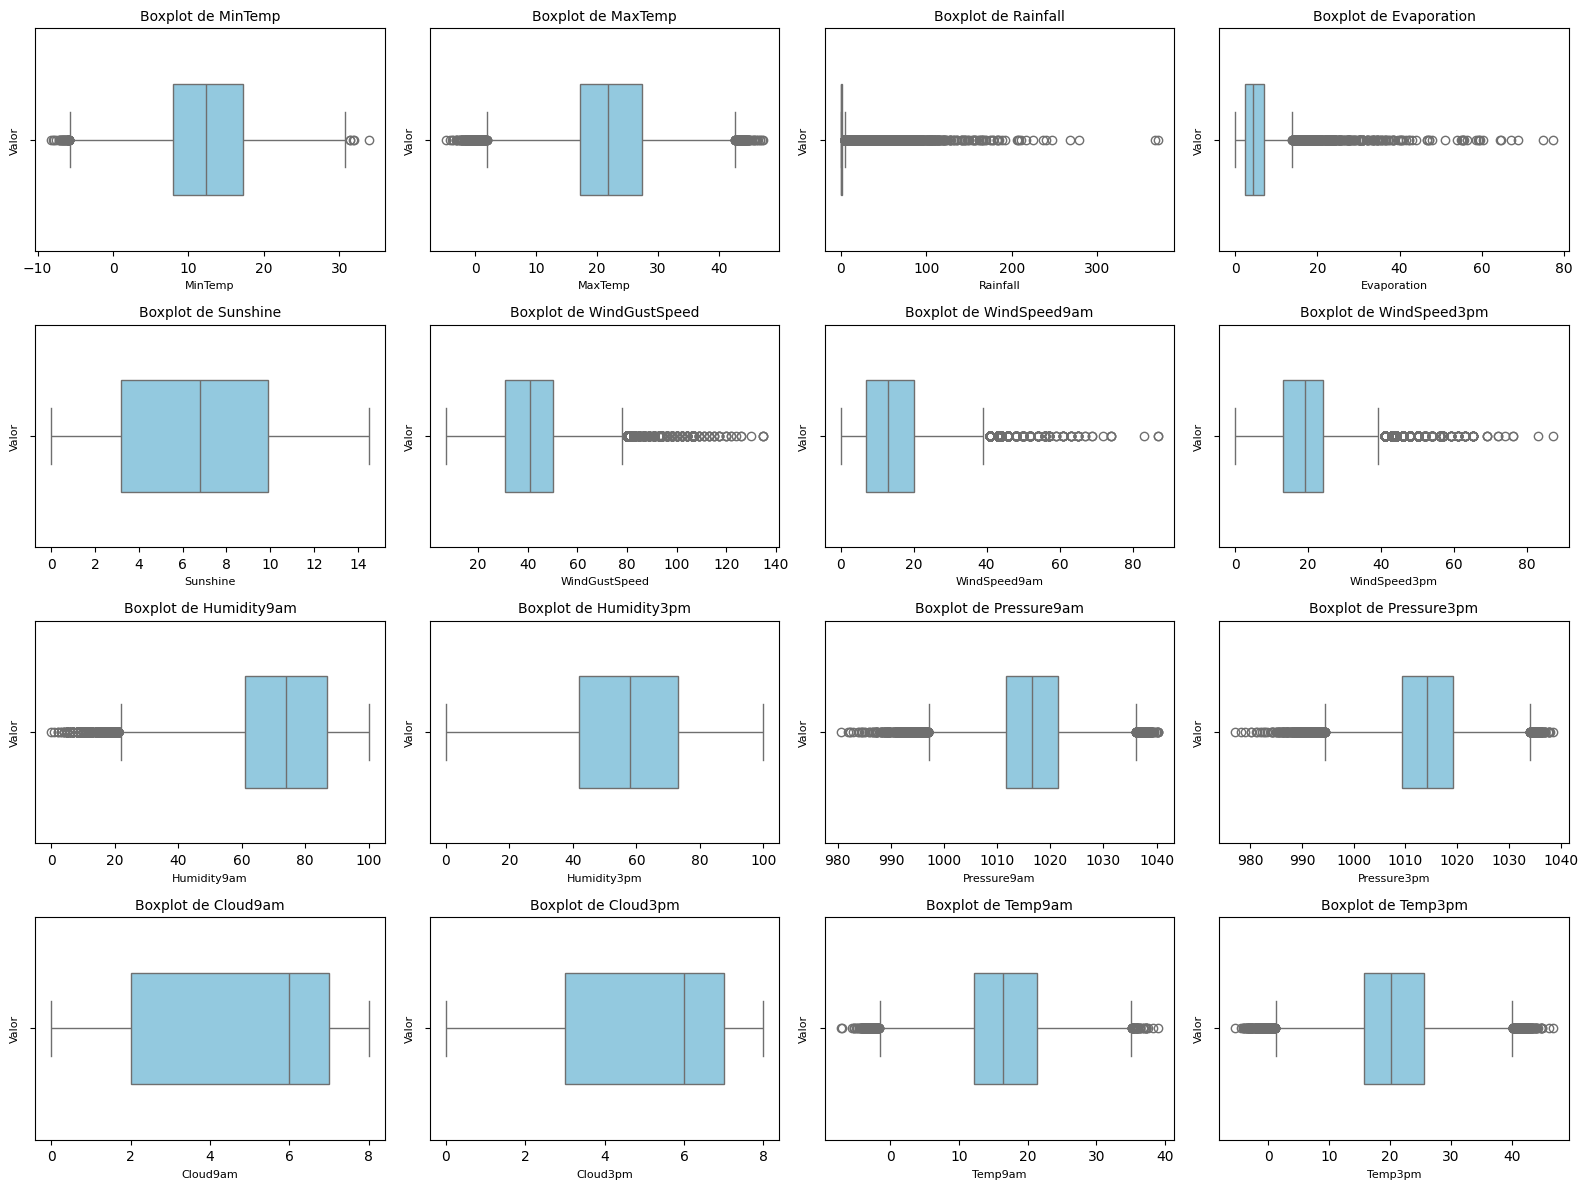

In [183]:
n_cols = 4 
n_rows = (len(var_num) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))  
axes = axes.flatten()  

for idx, columna in enumerate(var_num):
    sns.boxplot(x=data[columna], color='skyblue', width=0.5, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {columna}', fontsize=10)
    axes[idx].set_xlabel(columna, fontsize=8)
    axes[idx].set_ylabel('Valor', fontsize=8)

for ax in axes[len(var_num):]:
    ax.set_visible(False)  

plt.tight_layout()
plt.show()

In [123]:
def resum_outliers(data: pd.DataFrame, var_num:list) -> None:

    """ 
    Fa un resum dels valors atípics les columnes numèriques del DataFrame
    """

    outliers_summary = pd.DataFrame(columns=['Variable', 'Lower Outlier Threshold', 'Upper Outlier Threshold', 'Min Value', 'Max Value', 'Number of Outliers'])
    
    for column in var_num:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        
        min_value = data[column].min()
        max_value = data[column].max()
        num_outliers = outliers.count()
        new_row = pd.DataFrame({
            'Variable': [column],
            'Lower Outlier Threshold': [lower_bound],
            'Upper Outlier Threshold': [upper_bound],
            'Min Value': [min_value],
            'Max Value': [max_value],
            'Number of Outliers': [num_outliers]
        })
        outliers_summary = pd.concat([outliers_summary, new_row], ignore_index=True)

    outliers_summary_str = outliers_summary.to_string(index=False)
    separator = '-' * len(outliers_summary_str.split('\n')[0])
    print(separator)
    print(outliers_summary_str.replace('\n', '\n' + separator + '\n'))

In [124]:
resum_outliers(data, var_num)

--------------------------------------------------------------------------------------------------------
     Variable  Lower Outlier Threshold  Upper Outlier Threshold  Min Value  Max Value Number of Outliers
--------------------------------------------------------------------------------------------------------
      MinTemp                    -5.80                    31.00       -8.2       33.9                 42
--------------------------------------------------------------------------------------------------------
      MaxTemp                     1.90                    42.70       -4.8       47.3                317
--------------------------------------------------------------------------------------------------------
     Rainfall                    -3.30                     5.50        0.0      371.0              10500
--------------------------------------------------------------------------------------------------------
  Evaporation                    -4.50                 

/var/folders/3l/_d7xdffd13dgghrq79vfcbym0000gn/T/ipykernel_4178/1876728539.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_summary = pd.concat([outliers_summary, new_row], ignore_index=True)


Un cop visualitzats els outliers de cada variable numèrica procedim a borrar els més extrems

In [125]:
outliers_rainfall = data[data['Rainfall'] > 250].index
count_rainfall = len(outliers_rainfall)

outliers_evaporation = data[(data['Evaporation'] < 0) | (data['Evaporation'] > 20)].index
count_evaporation = len(outliers_evaporation)

outliers_windgust = data[(data['WindGustSpeed'] < 0) | (data['WindGustSpeed'] > 100)].index
count_windgust = len(outliers_windgust)

data = data.drop(outliers_rainfall.union(outliers_evaporation).union(outliers_windgust))

total_outliers_removed = count_rainfall + count_evaporation + count_windgust

print('Outliers totals eliminats: ', total_outliers_removed)

310


### Identifiació i tractament de missing values

In [126]:
def identificacio_missings(dataframe: pd.DataFrame) -> None:

    """ 
    Es realitza una exploració de les dades, imprimint detalls de l'estructura de
    dades i un resum dels valors faltants de cada variable.
    """

    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

In [127]:
identificacio_missings(data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (66712, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 66712 entries, 0 to 67020
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        65558 non-null  float64
 1   MaxTemp        65633 non-null  float64
 2   Rainfall       63966 non-null  float64
 3   Evaporation    37325 non-null  float64
 4   Sunshine       34700 non-null  float64
 5   WindGustDir    61233 non-null  object 
 6   WindGustSpeed  61275 non-null  float64
 7   WindDir9am     61966 non-null  object 
 8   WindDir3pm     64430 non-null  object 
 9   WindSpeed9am   65665 non-null  float64
 10  WindSpeed3pm   65025 non-null  float64
 11  Humidity9am    64956 non-null  float64
 12  Humidity3pm    64092 non-null  float64
 13  Pressure9am    59453 non-null  float64
 

Borrem les files que tenen missing data a RainTomorrow perquè no podrem predir la variable si no sabem el seu valor real. 

In [128]:
data = data.dropna(subset=['RainTomorrow'])

Borrem les files que tenen missing data d'aquelles variables que tinguin un alt percentatge de missing data

In [129]:
data = data.dropna(subset=['Sunshine'])

In [130]:
identificacio_missings(data)
data.shape

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (33455, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 33455 entries, 2683 to 65764
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        33405 non-null  float64
 1   MaxTemp        33431 non-null  float64
 2   Rainfall       33173 non-null  float64
 3   Evaporation    31637 non-null  float64
 4   Sunshine       33455 non-null  float64
 5   WindGustDir    31253 non-null  object 
 6   WindGustSpeed  31267 non-null  float64
 7   WindDir9am     32349 non-null  object 
 8   WindDir3pm     33114 non-null  object 
 9   WindSpeed9am   33362 non-null  float64
 10  WindSpeed3pm   33254 non-null  float64
 11  Humidity9am    33252 non-null  float64
 12  Humidity3pm    33156 non-null  float64
 13  Pressure9am    33394 non-null  float6

(33455, 25)

Es probaran diferents tècniques d'imputació per veure quina és més eficaç: KNN i MICE

In [133]:
def imputacio_missings(X_train, X_test, metode = None):
    
    """
    Aplica la imputació desitjada als valors faltants del conjunt de dades.
    """

    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()

    if metode == 'knn':
        imputer = KNNImputer(n_neighbors=5)
        X_train_imputat = imputer.fit_transform(X_train_copy)
        X_test_imputat = imputer.transform(X_test_copy)
        
    elif metode == 'mice':
        imputer = IterativeImputer(max_iter=10, random_state=0)
        X_train_imputat = imputer.fit_transform(X_train_copy)
        X_test_imputat = imputer.transform(X_test_copy)
    
    else:
        X_train_imputat = X_train_copy
        X_test_imputat = X_test_copy
    
    return X_train_imputat, X_test_imputat



Un cop feta la imputació de valors faltants, es fa una comparació de les dues distribucions abans i després de la imputació

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

def evaluacio_imputacio(original_data: pd.DataFrame, imputed_data: pd.DataFrame, columns: list) -> None:
    
    """
    Mitjançant gràfics i estadístiques veiem el impacte de la imputació en la distribució 
    de les dades. 
    """
    
    for column in columns:

        if pd.api.types.is_numeric_dtype(original_data[column]):
            fig, ax = plt.subplots(1, 2, figsize=(12, 6))
            
            sns.histplot(original_data[column], kde=True, color='blue', ax=ax[0], stat='density', label='Original', bins=30)
            sns.histplot(imputed_data[column], kde=True, color='red', ax=ax[0], stat='density', label='Imputed', bins=30)
            ax[0].set_title(f'Distribution of {column} before and after imputation')
            ax[0].legend()

            sns.boxplot(data=[original_data[column].dropna(), imputed_data[column]], ax=ax[1])
            ax[1].set_xticklabels(['Original', 'Imputed'])
            ax[1].set_title(f'Boxplot of {column} before and after imputation')
            
            plt.tight_layout()
            plt.show()

            original_stats = original_data[column].describe()
            imputed_stats = imputed_data[column].describe()
            stats_comparison = pd.DataFrame({'Original': original_stats, 'Imputed': imputed_stats})
            print(stats_comparison)


# df_original = pd.read_csv('original_data.csv')
# df_imputed = pd.read_csv('imputed_data.csv')
# columns_to_evaluate = ['Column1', 'Column2']
# evaluate_imputation(df_original, df_imputed, columns_to_evaluate)


### Balanceig de les dades

A l'anàlisi univariant i bivariant ja hem vist que la nostra variable a predir està molt balancejada

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

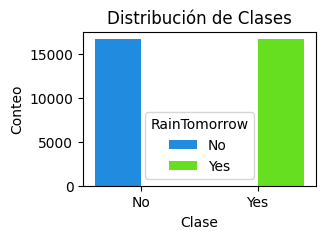

In [132]:
data['RainTomorrow'].value_counts()

plt.figure(figsize=(3, 2))
sns.countplot(x='RainTomorrow', hue='RainTomorrow', data=data, palette="gist_rainbow_r")
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()


Per tant, no cal utilitzar cap tècnica de oversampling o undersampling. 

### Normalització de les dades

S'ha probat de normalitzar les dades amb dos mètodes diferents: MinMax i StandardScaler

In [134]:
def normalitzacio_dades(X_train, X_test, metode=None):

    """
    Normalitza el conjunt de dades d'entrenament i el de proba fent servir el mètode
    d'escalat específicat. Retorna els dos conjunt de dades normalitzats. 
    """
    
    if metode == 'standard':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled
    
    elif metode == 'minmax':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled
    
    else:
        return X_train, X_test

## 3. REMOSTREIG

Com a model lineal es fa una regressió logística ja que la nostra variable objectiu és binària.

In [135]:
def particio_dades(data):

    """
    Divideix conjunt de dades en un d'entrenament (70%) i un de proba (30%), 
    utilitzant RainTomorrow com a variable objectiu
    """
    
    X = data.copy()
    X = X.drop('RainTomorrow', axis=1)
    y = data['RainTomorrow']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return  X_train, X_test, y_train, y_test

Visualitzarem els resultats mitjançant una matriu de confusió, una corba roc i altres mètriques

In [136]:
def visualitzar_matriu_confusio(y_test, y_pred):

    """ Fa la matriu de confusió dels resultats del model """

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriu de Confusió')
    plt.xlabel('Prediccions')
    plt.ylabel('Valores Reals')
    plt.show()

In [137]:
def visualitzar_corba_roc(y_test, y_pred):

    """ Fa la corba ROC dels resultats del model """

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [139]:
from sklearn import metrics
import matplotlib.pyplot as plt

def visualitzar_corba_roc_avancada(y_true, y_pred):

    """
    A part de fer la corba ROC, també mostra l'àrea sota la sorba (AUC) de les prediccions fetes. 
    """
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    auc = metrics.roc_auc_score(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# visualitzar_corba_roc_avancada(y_test, y_scores)


In [140]:
def calcul_metriques(y_pred, y_true):

    """
    Fa i mostra el càlcul de la Precisió, Recall, F1-score i Accuracy del model
    """

    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    accuracy = accuracy_score(y_true, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Accuracy:", accuracy)
    return precision, recall, f1, accuracy


Creem un DataFrame per guardar els resultats de tots els models que entrenem

In [143]:
resultats_models = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])

In [142]:
def afegir_resultats(model_name, accuracy, f1_score, recall, precision, dataframe):

    """
    Donat el nom d'un model i els seus resultats, els afegeix al DataFrame on es 
    guarda la comparació de resultats. 
    """

    new_row = pd.DataFrame({
        'Model Name': [model_name],
        'Accuracy': [accuracy],
        'F1 Score': [f1_score],
        'Recall': [recall],
        'Precision': [precision]
    })

    updated_dataframe = pd.concat([dataframe, new_row], ignore_index=True)
    return updated_dataframe


Ara escollim el preprocessament que volem aplicar

In [144]:
def preprocessament(data, escalat = 'minmax', imputacio = 'knn'):

    """ 
    Realitza el preprocessament complet del conjunt de dades:
    - Partició de les dades
    - Recodificació de variables categòriques
    - Normalització de dades
    - Imputació de valors faltants
    """

    X_train, X_test, y_train, y_test = particio_dades(data)

    encoder = LabelEncoder()
    y_train_encoded = encoder.fit_transform(y_train)
    y_test_encoded = encoder.transform(y_test)
    
    numeriques = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

    X_train_encoded, X_test_encoded = recodificacio_one_hot(X_train, X_test, categoriques, numeriques)
    X_train_encoded, X_test_encoded = normalitzacio_dades(X_train_encoded, X_test_encoded, escalat)
    X_train_imputed, X_test_imputed = imputacio_missings(X_train_encoded, X_test_encoded, imputacio)

    return X_train_imputed, X_test_imputed, y_train_encoded, y_test_encoded

In [147]:
def entrenament_linearmodel(data, model, nom, resultats_models, parametres=None, escala = 'minmax', imputacio = 'knn'):
    
    """
    Entrena un model lineal fent ús de les nostres dades preprocessades. 
    En el cas de que es puguin triar hiperparàmetres, es fa una validació creuada per 
    trobar el millor hiperparàmetre i finalment s'evalua el model. 
    """

    X_train, X_test, y_train, y_test = preprocessament(data, escala, imputacio)

    if parametres:
        grid_search = GridSearchCV(model, parametres, cv=5, scoring='f1')
        grid_search.fit(X_train, y_train)
        print("Millors paràmetres:", grid_search.best_params_)
        print("Millor F1 score en CV:", grid_search.best_score_)
        model = grid_search.best_estimator_

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precision, recall, f1, accuracy = calcul_metriques(y_pred, y_test)
    visualitzar_matriu_confusio(y_test, y_pred)
    visualitzar_corba_roc(y_test, y_pred)
    resultats_models = afegir_resultats(nom, accuracy, f1, recall, precision, resultats_models)

    return resultats_models


## 4. MODEL LINEAL BASE

### Logistic Regression

Sense fer ús d'hiperparàmetres

Precision: 0.8083503054989817
Recall: 0.7971480216911027
F1-Score: 0.8027100819091921
Accuracy: 0.8056192089269703


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


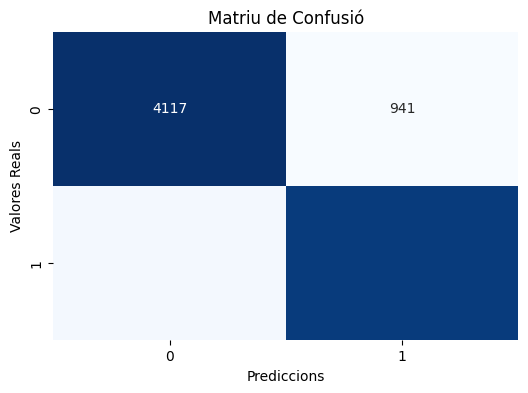

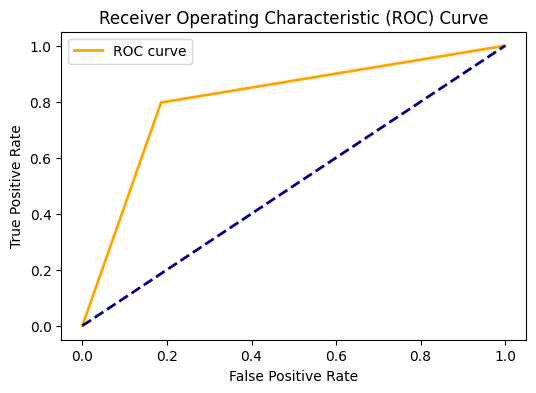

         Model Name  Accuracy  F1 Score    Recall  Precision
0  LinearRegression  0.805619   0.80271  0.797148    0.80835


/var/folders/3l/_d7xdffd13dgghrq79vfcbym0000gn/T/ipykernel_4178/927645464.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_dataframe = pd.concat([dataframe, new_row], ignore_index=True)


In [148]:
model = LogisticRegression()
resultats_models = entrenament_linearmodel(data, model, 'LinearRegression',resultats_models, parametres=None, escala = 'minmax', imputacio = 'knn')
print(resultats_models)

Amb la búsqueda d'hiperparàmetres

Millors paràmetres: {'C': 1, 'penalty': 'l1'}
Millor F1 score en CV: 0.8001228266789218
Precision: 0.8097190896042649
Recall: 0.7931311508335007
F1-Score: 0.8013392857142857
Accuracy: 0.8049217893792966


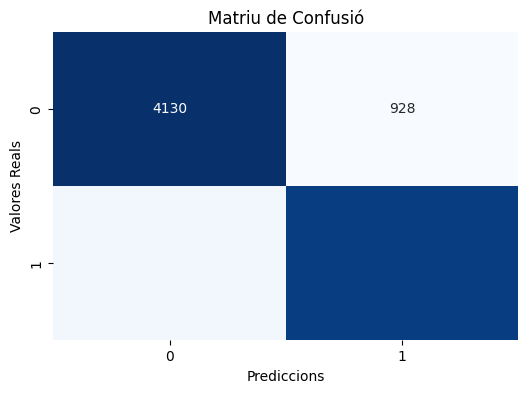

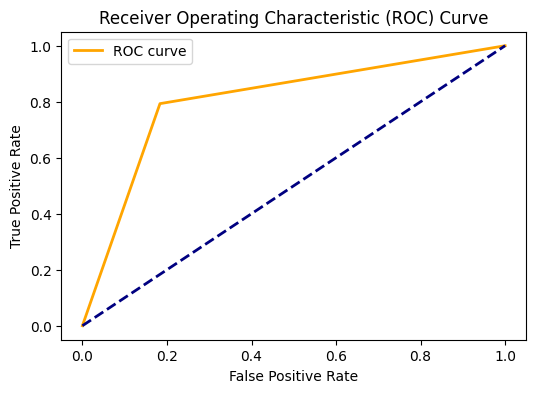

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.805619  0.802710  0.797148   0.808350
1  LinearRegressionReg  0.804922  0.801339  0.793131   0.809719


In [149]:
model = LogisticRegression(solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1],  # Valors per la regularització: afegir valors 10 i 100
    'penalty': ['l1', 'l2']  # Tipus de penalització
}

resultats_models = entrenament_linearmodel(data, model, 'LinearRegressionReg', resultats_models, parametres=param_grid, escala = 'minmax', imputacio = 'knn')
print(resultats_models)



### Random Forest

Precision: 0.8141256502601041
Recall: 0.8172323759791122
F1-Score: 0.8156760549263306
Accuracy: 0.8167779216897479


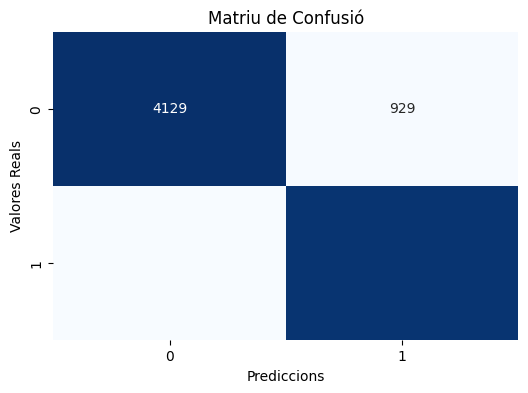

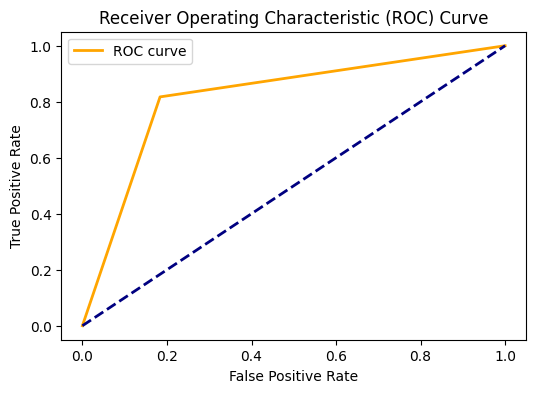

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.805619  0.802710  0.797148   0.808350
1  LinearRegressionReg  0.804922  0.801339  0.793131   0.809719
2         RandomForest  0.816778  0.815676  0.817232   0.814126


In [150]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
parametres = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

resultats_models = entrenament_linearmodel(data, model,'RandomForest', resultats_models, parametres=None, escala = 'minmax', imputacio = 'knn')
print(resultats_models)

# PERCEPTRÓ MULTICAPA

Entrenarem diferents models del MLP canviant diferents paràmetres:

- Optimizers: o Adam o SGD
- Learning rate
- Nombre de epochs
- Regularització: l1 o l2
- Nombre de capes
- Nombre de neurones per capa
- Drop out de les neurones

In [154]:
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training Accuracy')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation Accuracy')
  axes[1].set_title('Training and Validation Accuracy')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

In [155]:
datos = data.copy()
X_train, X_test, y_train, y_test = preprocessament(datos)

In [184]:
def entrenament_MLP(X_train, y_train, layers_info, optimizer_info, num_epochs = 100, batch_size = 16, validation_split = 0.1):
    
    """
    Entrena un Perceptró Multicapa donada la informació 
    sobre cada capa (dropout, regularització), el tipus d'optimització i el 
    nombre de epochs i batch_size. 
    
    Retorna el model entrenat i les dades del procés d'entrenament.
    """
    
    model = Sequential()
    for layer in layers_info:
        regularizer = None
        if 'regularizer' in layer:
            regularizer = l1_l2(l1=layer['regularizer'].get('l1', 0), l2=layer['regularizer'].get('l2', 0))
        
        model.add(Dense(layer['neurons'], activation=layer['activation'], kernel_regularizer=regularizer))
        
        if 'dropout' in layer:
            model.add(Dropout(rate=layer['dropout']))

    if optimizer_info['type'] == 'adam':
        optimizer = Adam(learning_rate=optimizer_info['learning_rate'])
    elif optimizer_info['type'] == 'sgd':
        optimizer = SGD(learning_rate=optimizer_info['learning_rate'], momentum=optimizer_info.get('momentum', 0), nesterov=optimizer_info.get('nesterov', False))

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split, verbose=2)

    return model, history


In [173]:
def evaluacio_MLP(X_test, y_test, model, history, resultats_models, nom_model):


    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1) if model.output_shape[-1] > 1 else (y_pred > 0.5).astype("int32")

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    plot_curves(history)
    
    precision = precision_score(y_test, y_pred_classes, average='macro')
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    recall = recall_score(y_test, y_pred_classes, average='macro')
    
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    print("Test Precision:", precision)
    print("Test F1 Score:", f1)
    print("Test Recall:", recall)
    print('')
    resultats_models = afegir_resultats(nom_model, accuracy, f1, recall, precision, resultats_models)

    return resultats_models

MODEL 1

Començarem amb només una capa, un nombre petit d'epochs i un learning_rate no molt petit

In [171]:
learning_rate = 0.1
optimizer_info = {'type': 'adam', 'learning_rate': learning_rate}
num_epochs = 10
batch_size = 8
layers_info = [{'neurons': 2, 'activation': 'softmax'}] # Usar softmax de activation

model, history = entrenament_MLP(X_train, y_train, layers_info, optimizer_info, num_epochs=num_epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10


2635/2635 - 2s - 627us/step - accuracy: 0.7537 - loss: 0.5681 - val_accuracy: 0.7857 - val_loss: 0.4950
Epoch 2/10
2635/2635 - 1s - 462us/step - accuracy: 0.7623 - loss: 0.5689 - val_accuracy: 0.7395 - val_loss: 0.6040
Epoch 3/10
2635/2635 - 1s - 451us/step - accuracy: 0.7589 - loss: 0.5635 - val_accuracy: 0.7784 - val_loss: 0.5010
Epoch 4/10
2635/2635 - 1s - 457us/step - accuracy: 0.7614 - loss: 0.5702 - val_accuracy: 0.7993 - val_loss: 0.4661
Epoch 5/10
2635/2635 - 1s - 463us/step - accuracy: 0.7591 - loss: 0.5653 - val_accuracy: 0.7857 - val_loss: 0.5170
Epoch 6/10
2635/2635 - 1s - 474us/step - accuracy: 0.7624 - loss: 0.5592 - val_accuracy: 0.7835 - val_loss: 0.5482
Epoch 7/10
2635/2635 - 1s - 463us/step - accuracy: 0.7613 - loss: 0.5664 - val_accuracy: 0.7669 - val_loss: 0.4939
Epoch 8/10
2635/2635 - 1s - 496us/step - accuracy: 0.7601 - loss: 0.5704 - val_accuracy: 0.6951 - val_loss: 0.8256
Epoch 9/10
2635/2635 - 1s - 503us/step - accuracy: 0.7613 - loss: 0.5588 - val_accuracy: 0.

"resultats_models = evaluacio_MLP(X_test, y_test, model, history, resultats_models, 'MLP 1')\nprint(resultats_models)"

314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


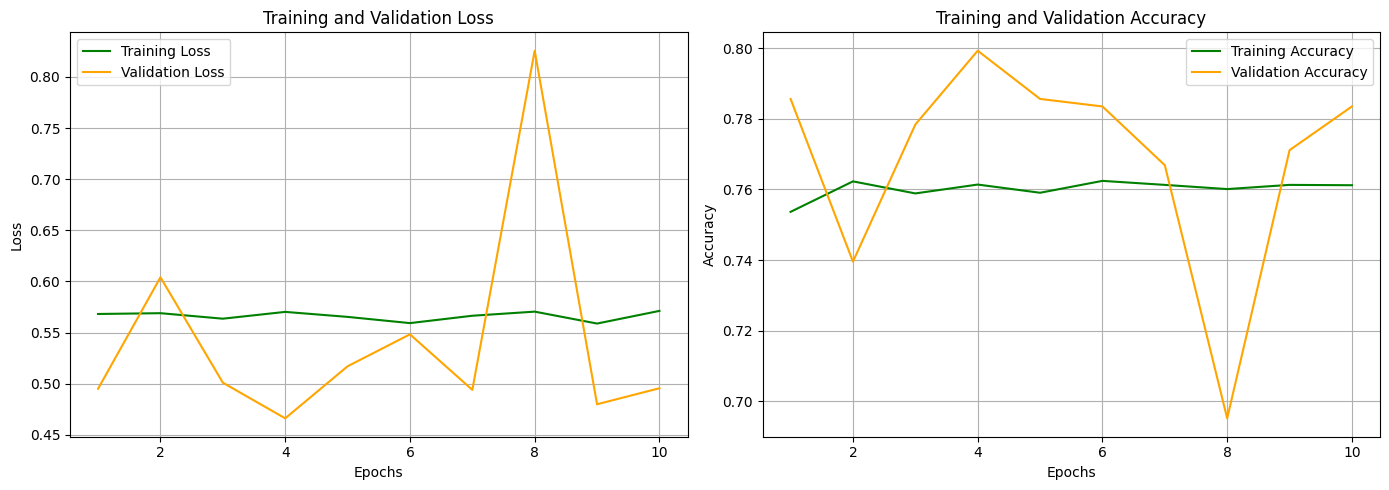

Test Loss: 0.5104483962059021
Test Accuracy: 0.7773239016532898
Test Precision: 0.7901460863859815
Test F1 Score: 0.775171784251578
Test Recall: 0.7781421789626355
            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.805619  0.802710  0.797148   0.808350
1  LinearRegressionReg  0.804922  0.801339  0.793131   0.809719
2         RandomForest  0.816778  0.815676  0.817232   0.814126
3                MLP 1  0.777324  0.775172  0.778142   0.790146


In [172]:
resultats_models = evaluacio_MLP(X_test, y_test, model, history, resultats_models, 'MLP 1')
print(resultats_models)

MODEL 2

Ara probarem a agafar dues capes més per veure si millora el model

Epoch 1/200
1318/1318 - 2s - 1ms/step - accuracy: 0.7776 - loss: 0.4637 - val_accuracy: 0.7972 - val_loss: 0.4300
Epoch 2/200
1318/1318 - 1s - 543us/step - accuracy: 0.7993 - loss: 0.4295 - val_accuracy: 0.7989 - val_loss: 0.4241
Epoch 3/200
1318/1318 - 1s - 541us/step - accuracy: 0.8023 - loss: 0.4227 - val_accuracy: 0.8061 - val_loss: 0.4254
Epoch 4/200
1318/1318 - 1s - 536us/step - accuracy: 0.8047 - loss: 0.4175 - val_accuracy: 0.8057 - val_loss: 0.4197
Epoch 5/200
1318/1318 - 1s - 539us/step - accuracy: 0.8102 - loss: 0.4117 - val_accuracy: 0.8057 - val_loss: 0.4153
Epoch 6/200
1318/1318 - 1s - 535us/step - accuracy: 0.8097 - loss: 0.4099 - val_accuracy: 0.8074 - val_loss: 0.4214
Epoch 7/200
1318/1318 - 1s - 542us/step - accuracy: 0.8123 - loss: 0.4044 - val_accuracy: 0.8015 - val_loss: 0.4213
Epoch 8/200
1318/1318 - 1s - 536us/step - accuracy: 0.8123 - loss: 0.4036 - val_accuracy: 0.8074 - val_loss: 0.4157
Epoch 9/200
1318/1318 - 1s - 534us/step - accuracy: 0.8123 - loss: 0.3997 

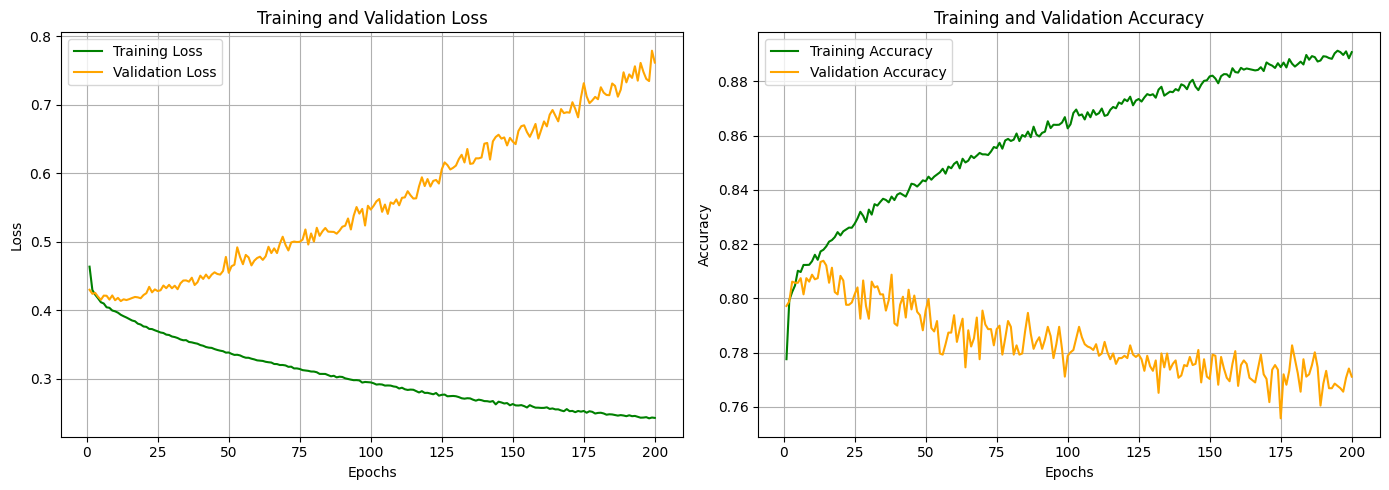

Test Loss: 0.6946830153465271
Test Accuracy: 0.7763276100158691
Test Precision: 0.7764802531892725
Test F1 Score: 0.7763224723199487
Test Recall: 0.7764133282284607

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.805619  0.802710  0.797148   0.808350
1  LinearRegressionReg  0.804922  0.801339  0.793131   0.809719
2         RandomForest  0.816778  0.815676  0.817232   0.814126
3                MLP 1  0.777324  0.775172  0.778142   0.790146
4                MLP 1  0.776328  0.776322  0.776413   0.776480


In [175]:
layers_info = [
        {'neurons': 64, 'activation': 'relu', 'kernel_initializer': 'he_uniform'},
        {'neurons': 32, 'activation': 'relu', 'kernel_initializer': 'he_uniform'},
        {'neurons': 2, 'activation': 'softmax'}
    ]
optimizer_info = {'type': 'adam', 'learning_rate': 0.001}
num_epochs = 200
batch_size = 16

model, history = entrenament_MLP(X_train, y_train, layers_info, optimizer_info, num_epochs=num_epochs, batch_size=batch_size, validation_split=0.1)
resultats_models = evaluacio_MLP(X_test, y_test, model, history, resultats_models, 'MLP 2')
print(resultats_models)

A les imatges podem veure que el model s'està sobreajustant molt a les dades del train i acaba donant inclús pitjors resultats que el model amb una sola capa per les dades del test. Per això, ara experimentarem amb dues capes i també amb l'aplicació de una regularització l1 o l2.

MODEL 3

Epoch 1/200
1318/1318 - 1s - 1ms/step - accuracy: 0.7645 - loss: 0.7965 - val_accuracy: 0.7848 - val_loss: 0.5295
Epoch 2/200
1318/1318 - 1s - 524us/step - accuracy: 0.7748 - loss: 0.5447 - val_accuracy: 0.7216 - val_loss: 0.6251
Epoch 3/200
1318/1318 - 1s - 514us/step - accuracy: 0.7715 - loss: 0.5432 - val_accuracy: 0.7703 - val_loss: 0.5569
Epoch 4/200
1318/1318 - 1s - 556us/step - accuracy: 0.7743 - loss: 0.5407 - val_accuracy: 0.7775 - val_loss: 0.5331
Epoch 5/200
1318/1318 - 1s - 538us/step - accuracy: 0.7716 - loss: 0.5418 - val_accuracy: 0.7741 - val_loss: 0.5383
Epoch 6/200
1318/1318 - 1s - 493us/step - accuracy: 0.7701 - loss: 0.5425 - val_accuracy: 0.7716 - val_loss: 0.5347
Epoch 7/200
1318/1318 - 1s - 498us/step - accuracy: 0.7710 - loss: 0.5425 - val_accuracy: 0.7532 - val_loss: 0.5713
Epoch 8/200
1318/1318 - 1s - 529us/step - accuracy: 0.7704 - loss: 0.5429 - val_accuracy: 0.7216 - val_loss: 0.6242
Epoch 9/200
1318/1318 - 1s - 507us/step - accuracy: 0.7687 - loss: 0.5422 

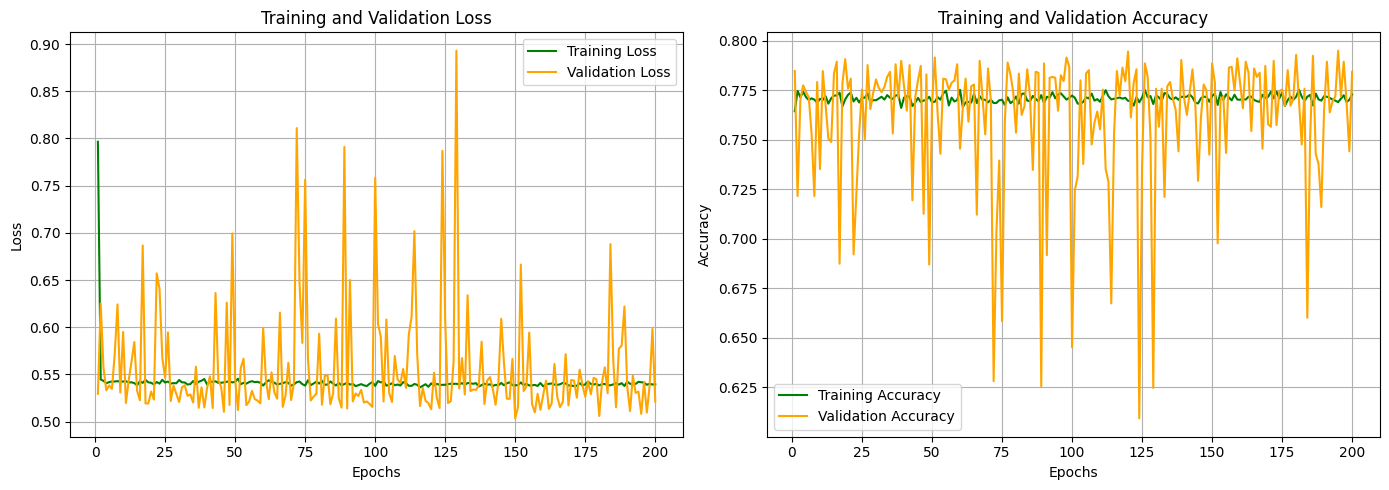

Test Loss: 0.5183155536651611
Test Accuracy: 0.7866892218589783
Test Precision: 0.789648550586645
Test F1 Score: 0.7859696126531328
Test Recall: 0.7862815640637296

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.805619  0.802710  0.797148   0.808350
1  LinearRegressionReg  0.804922  0.801339  0.793131   0.809719
2         RandomForest  0.816778  0.815676  0.817232   0.814126
3                MLP 1  0.777324  0.775172  0.778142   0.790146
4                MLP 1  0.776328  0.776322  0.776413   0.776480
5          MLP 3 (reg)  0.786689  0.785970  0.786282   0.789649


In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1_l2

layers_info = [
    {'neurons': 32, 'activation': 'relu', 'regularizer': {'l1': 0.01, 'l2': 0.01}},
    {'neurons': 16, 'activation': 'relu', 'regularizer': {'l1': 0.01, 'l2': 0.01}},
    {'neurons': 2, 'activation': 'softmax'}
]

optimizer_info = {
    'type': 'sgd',
    'learning_rate': 0.01,
    'momentum': 0.9,
    'nesterov': True
}

num_epochs = 200
batch_size = 16

model, history = entrenament_MLP(X_train, y_train, layers_info, optimizer_info, num_epochs=num_epochs, batch_size=batch_size, validation_split=0.1)
resultats_models = evaluacio_MLP(X_test, y_test, model, history, resultats_models, 'MLP 3 (reg)')
print(resultats_models)

Aquest model dona millors resultats tot i que veiem que no és gaire constant. 

MODEL 4

Entrenament amb dropouts

Epoch 1/100


659/659 - 1s - 2ms/step - accuracy: 0.7065 - loss: 1.2579 - val_accuracy: 0.7600 - val_loss: 0.6090
Epoch 2/100
659/659 - 0s - 639us/step - accuracy: 0.7485 - loss: 0.6120 - val_accuracy: 0.7780 - val_loss: 0.5784
Epoch 3/100
659/659 - 0s - 636us/step - accuracy: 0.7574 - loss: 0.5967 - val_accuracy: 0.7878 - val_loss: 0.5641
Epoch 4/100
659/659 - 0s - 634us/step - accuracy: 0.7587 - loss: 0.5889 - val_accuracy: 0.7904 - val_loss: 0.5538
Epoch 5/100
659/659 - 0s - 631us/step - accuracy: 0.7642 - loss: 0.5793 - val_accuracy: 0.7938 - val_loss: 0.5487
Epoch 6/100
659/659 - 0s - 630us/step - accuracy: 0.7648 - loss: 0.5735 - val_accuracy: 0.7921 - val_loss: 0.5411
Epoch 7/100
659/659 - 0s - 629us/step - accuracy: 0.7689 - loss: 0.5705 - val_accuracy: 0.7912 - val_loss: 0.5457
Epoch 8/100
659/659 - 0s - 651us/step - accuracy: 0.7694 - loss: 0.5658 - val_accuracy: 0.7959 - val_loss: 0.5348
Epoch 9/100
659/659 - 0s - 673us/step - accuracy: 0.7697 - loss: 0.5638 - val_accuracy: 0.7938 - val_l

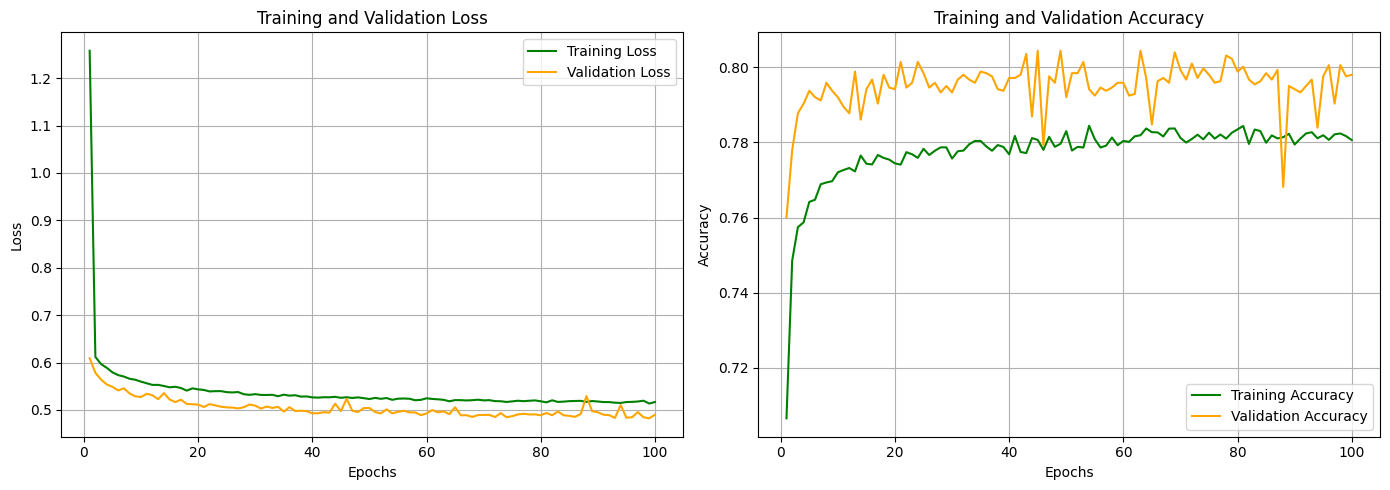

Test Loss: 0.48724815249443054
Test Accuracy: 0.7993424534797668
Test Precision: 0.7993886106767011
Test F1 Score: 0.7993016942259861
Test Recall: 0.7992798103160201

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.805619  0.802710  0.797148   0.808350
1  LinearRegressionReg  0.804922  0.801339  0.793131   0.809719
2         RandomForest  0.816778  0.815676  0.817232   0.814126
3                MLP 1  0.777324  0.775172  0.778142   0.790146
4                MLP 1  0.776328  0.776322  0.776413   0.776480
5          MLP 3 (reg)  0.786689  0.785970  0.786282   0.789649
6      MLP 4 (dropout)  0.496065  0.331580  0.500000   0.248032
7      MLP 4 (dropout)  0.799342  0.799302  0.799280   0.799389


In [180]:
layers_info = [
    {'neurons': 32, 'activation': 'relu', 'regularizer': {'l1': 0.01, 'l2': 0.01}, 'dropout': 0.1},
    {'neurons': 16, 'activation': 'relu', 'regularizer': {'l1': 0.01, 'l2': 0.01}, 'dropout': 0.1},
    {'neurons': 2, 'activation': 'softmax'}  # Capa de salida para una clasificación binaria
]

optimizer_info = {
    'type': 'adam',
    'learning_rate': 0.001  # Una tasa de aprendizaje más baja para entrenamientos más estables
}

num_epochs = 100
batch_size = 32
validation_split = 0.1

model, history = entrenament_MLP_dropout(X_train, y_train, layers_info, optimizer_info, num_epochs=num_epochs, batch_size=batch_size, validation_split=validation_split)
resultats_models = evaluacio_MLP(X_test, y_test, model, history, resultats_models, 'MLP 4 (dropout)')
print(resultats_models)

MODEL 5

Epoch 1/200
1318/1318 - 1s - 937us/step - accuracy: 0.7654 - loss: 0.4850 - val_accuracy: 0.7942 - val_loss: 0.4397
Epoch 2/200
1318/1318 - 1s - 508us/step - accuracy: 0.7947 - loss: 0.4367 - val_accuracy: 0.8015 - val_loss: 0.4285
Epoch 3/200
1318/1318 - 1s - 488us/step - accuracy: 0.7995 - loss: 0.4283 - val_accuracy: 0.8070 - val_loss: 0.4260
Epoch 4/200
1318/1318 - 1s - 487us/step - accuracy: 0.8014 - loss: 0.4240 - val_accuracy: 0.8023 - val_loss: 0.4215
Epoch 5/200
1318/1318 - 1s - 487us/step - accuracy: 0.8032 - loss: 0.4209 - val_accuracy: 0.8032 - val_loss: 0.4210
Epoch 6/200
1318/1318 - 1s - 486us/step - accuracy: 0.8039 - loss: 0.4196 - val_accuracy: 0.8066 - val_loss: 0.4177
Epoch 7/200
1318/1318 - 1s - 486us/step - accuracy: 0.8058 - loss: 0.4168 - val_accuracy: 0.8006 - val_loss: 0.4182
Epoch 8/200
1318/1318 - 1s - 505us/step - accuracy: 0.8059 - loss: 0.4159 - val_accuracy: 0.8044 - val_loss: 0.4156
Epoch 9/200
1318/1318 - 1s - 497us/step - accuracy: 0.8077 - loss: 0.414

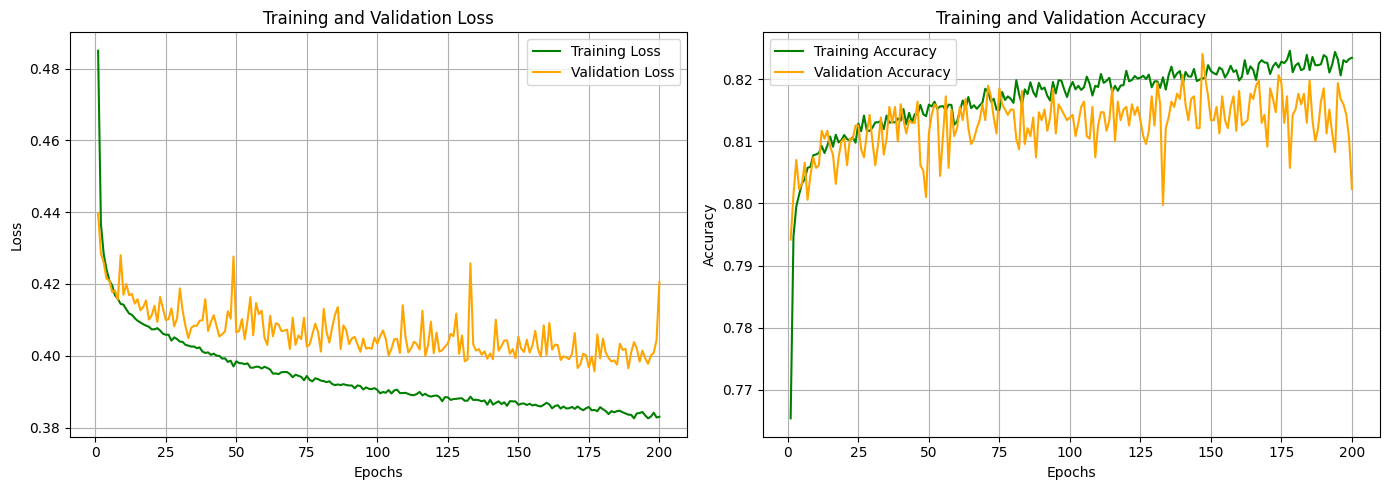

Test Loss: 0.4167329967021942
Test Accuracy: 0.8074125647544861
Test Precision: 0.8137697904180918
Test F1 Score: 0.8062242445143264
Test Recall: 0.8068461877568667

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.805619  0.802710  0.797148   0.808350
1  LinearRegressionReg  0.804922  0.801339  0.793131   0.809719
2         RandomForest  0.816778  0.815676  0.817232   0.814126
3                MLP 1  0.777324  0.775172  0.778142   0.790146
4                MLP 1  0.776328  0.776322  0.776413   0.776480
5          MLP 3 (reg)  0.786689  0.785970  0.786282   0.789649
6      MLP 4 (dropout)  0.496065  0.331580  0.500000   0.248032
7      MLP 4 (dropout)  0.799342  0.799302  0.799280   0.799389
8       MLP 4 (2capes)  0.807413  0.806224  0.806846   0.813770


In [181]:
layers_info = [
    {'neurons': 16, 'activation': 'relu'}, 
    {'neurons': 2, 'activation': 'softmax'}
]

optimizer_info = {
    'type': 'adam',
    'learning_rate': 0.001
}
num_epochs = 200
batch_size = 16 
validation_split = 0.1

model, history = entrenament_MLP(X_train, y_train, layers_info, optimizer_info, num_epochs=num_epochs, batch_size=batch_size, validation_split=validation_split)
resultats_models = evaluacio_MLP(X_test, y_test, model, history, resultats_models, 'MLP 4 (2capes)')
print(resultats_models)



MODEL 6

Epoch 1/200
1318/1318 - 1s - 1ms/step - accuracy: 0.7559 - loss: 0.5186 - val_accuracy: 0.7835 - val_loss: 0.4704
Epoch 2/200
1318/1318 - 1s - 508us/step - accuracy: 0.7871 - loss: 0.4679 - val_accuracy: 0.7938 - val_loss: 0.4558
Epoch 3/200
1318/1318 - 1s - 510us/step - accuracy: 0.7940 - loss: 0.4554 - val_accuracy: 0.7993 - val_loss: 0.4444
Epoch 4/200
1318/1318 - 1s - 502us/step - accuracy: 0.7994 - loss: 0.4495 - val_accuracy: 0.7985 - val_loss: 0.4368
Epoch 5/200
1318/1318 - 1s - 498us/step - accuracy: 0.7978 - loss: 0.4444 - val_accuracy: 0.7955 - val_loss: 0.4338
Epoch 6/200
1318/1318 - 1s - 500us/step - accuracy: 0.7976 - loss: 0.4426 - val_accuracy: 0.8032 - val_loss: 0.4331
Epoch 7/200
1318/1318 - 1s - 497us/step - accuracy: 0.8018 - loss: 0.4395 - val_accuracy: 0.7989 - val_loss: 0.4316
Epoch 8/200
1318/1318 - 1s - 498us/step - accuracy: 0.8016 - loss: 0.4386 - val_accuracy: 0.8049 - val_loss: 0.4331
Epoch 9/200
1318/1318 - 1s - 500us/step - accuracy: 0.8023 - loss: 0.4351 

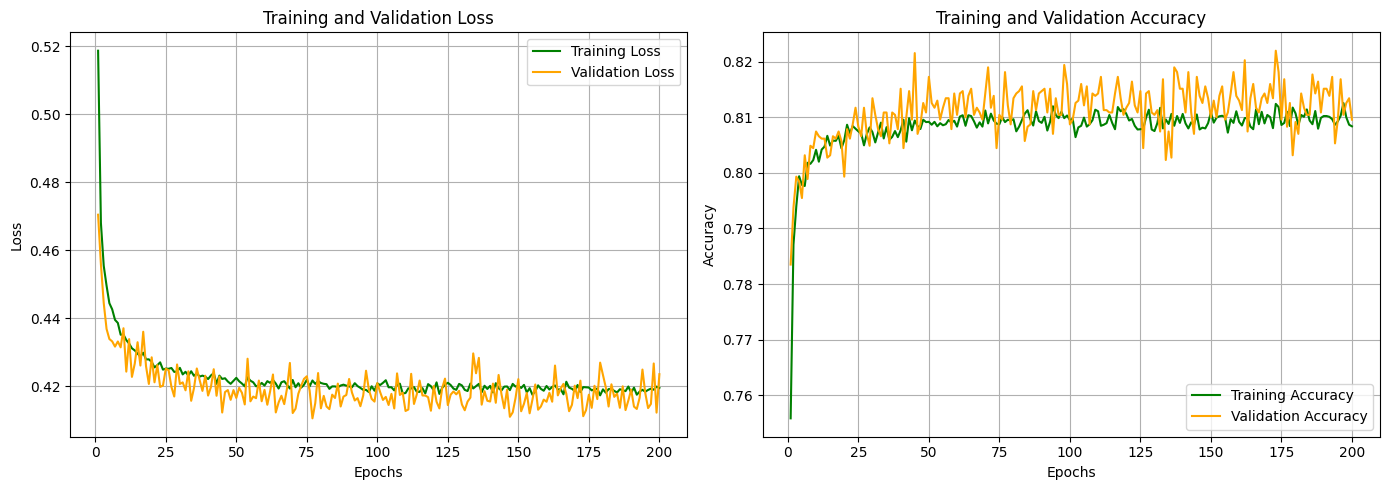

Test Loss: 0.41861191391944885
Test Accuracy: 0.807213306427002
Test Precision: 0.8074146120152401
Test F1 Score: 0.8071336381530151
Test Recall: 0.8071033373779999

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.805619  0.802710  0.797148   0.808350
1  LinearRegressionReg  0.804922  0.801339  0.793131   0.809719
2         RandomForest  0.816778  0.815676  0.817232   0.814126
3                MLP 1  0.777324  0.775172  0.778142   0.790146
4                MLP 1  0.776328  0.776322  0.776413   0.776480
5          MLP 3 (reg)  0.786689  0.785970  0.786282   0.789649
6      MLP 4 (dropout)  0.496065  0.331580  0.500000   0.248032
7      MLP 4 (dropout)  0.799342  0.799302  0.799280   0.799389
8       MLP 4 (2capes)  0.807413  0.806224  0.806846   0.813770
9  MLP 4 (2capes-drop)  0.807213  0.807134  0.807103   0.807415


In [182]:
from keras.regularizers import l2

layers_info = [
    {'neurons': 16, 'activation': 'relu', 'regularizer': {'l2': 0.001},'dropout': 0.1},  # Primera capa oculta con regularización L2
    {'neurons': 2, 'activation': 'softmax'}  
]

optimizer_info = {
    'type': 'adam',
    'learning_rate': 0.001 
}

num_epochs = 200  
batch_size = 16 
validation_split = 0.1  

model, history = entrenament_MLP(X_train, y_train, layers_info, optimizer_info, num_epochs=num_epochs, batch_size=batch_size, validation_split=validation_split)
resultats_models = evaluacio_MLP(X_test, y_test, model, history, resultats_models, 'MLP 4 (2capes-drop)')
print(resultats_models)

### MODEL GUANYADOR

Fer una taula comparativa amb tots els models testejats, explicant el model que creieu
que millor aborda al problema que esteu intentant resoldre. Finalment, detalleu quins
s ́on els problemes que heu trobat aix ́ı com les conclusions que extraieu.

In [183]:
resultats_models

,Model Name,Accuracy,F1 Score,Recall,Precision
0,LinearRegression,0.805619,0.802710,0.797148,0.808350
1,LinearRegressionReg,0.804922,0.801339,0.793131,0.809719
2,RandomForest,0.816778,0.815676,0.817232,0.814126
3,MLP 1,0.777324,0.775172,0.778142,0.790146
4,MLP 1,0.776328,0.776322,0.776413,0.776480
5,MLP 3 (reg),0.786689,0.785970,0.786282,0.789649
6,MLP 4 (dropout),0.496065,0.331580,0.500000,0.248032
7,MLP 4 (dropout),0.799342,0.799302,0.799280,0.799389
8,MLP 4 (2capes),0.807413,0.806224,0.806846,0.813770
9,MLP 4 (2capes-drop),0.807213,0.807134,0.807103,0.807415


- Diagnosticar situació actual del model(corbes de perdua, mètriques de rendiment, matriu de confusió i model summary)
- Fa underfit, fit o overfit? Entre els possibles diagnòstics estan l’underfit, fit, overfit, inestabilitat del procés d’aprenentatge, manca de convergència, convergència excessivament ràpida/lenta,
comportament aleatori, etc.


• Proposar una millora potencial en funci ́o del diagn`ostic anterior, com per exemple
canvis a l’arquitectura del model o ajustament d’hiperpar`ametres.
• Experimentar amb la millora seleccionada i avaluar-ne l’impacte en el rendiment
del model.